## Installation

In [1]:
pip install -q tensorflow tensorflow-datasets

## Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

## Datasets

In [3]:
# tfds.list_builders() for all avaiable datasets

builder = tfds.builder("rock_paper_scissors")
info = builder.info

info


tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

## Data prepatations

In [4]:
ds_train = tfds.load(name="rock_paper_scissors", split='train')
ds_test = tfds.load(name='rock_paper_scissors', split='test')

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete0P13HC/rock_paper_scissors-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete0P13HC/rock_paper_scissors-test.tfrecord
Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


## Show some example

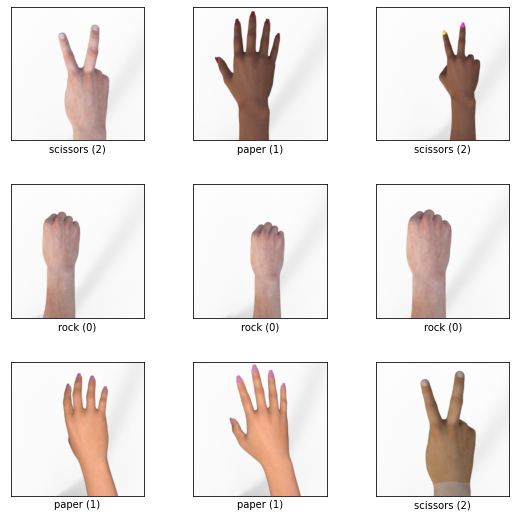

In [5]:
fig = tfds.show_examples(ds_test, info)

## Additional data preparation

In [6]:
# conversion in numpy and to gray scale
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [8]:
train_images = train_images.reshape(2520,300,300,1)
test_images = test_images.reshape(372,300,300,1)

In [7]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalization
train_images /= 255
test_images /=255

## Train first nn

In [10]:
# fully connected layers
model = keras.Sequential([
  keras.layers.Flatten(),                        
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics =['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)


Epoch 1/5
79/79 [==============================] - 1s 17ms/step - loss: 21.7934 - accuracy: 0.4135
Epoch 2/5
79/79 [==============================] - 1s 16ms/step - loss: 1.8797 - accuracy: 0.6881
Epoch 3/5
79/79 [==============================] - 1s 16ms/step - loss: 0.7277 - accuracy: 0.7702
Epoch 4/5
79/79 [==============================] - 1s 16ms/step - loss: 0.4880 - accuracy: 0.8472
Epoch 5/5
79/79 [==============================] - 1s 16ms/step - loss: 0.2669 - accuracy: 0.9016


In [11]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 7ms/step - loss: 2.4304 - accuracy: 0.4785


[2.4304087162017822, 0.4784946143627167]

## Convolutional approach

In [13]:
model = keras.Sequential([
  keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics =['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)



Epoch 1/5
 2/79 [..............................] - ETA: 6s - loss: 88.1302 - accuracy: 0.2344WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0500s vs `on_train_batch_end` time: 0.1085s). Check your callbacks.


79/79 [==============================] - 13s 159ms/step - loss: 5.9579 - accuracy: 0.5643
Epoch 2/5
79/79 [==============================] - 12s 153ms/step - loss: 0.4365 - accuracy: 0.9131
Epoch 3/5
79/79 [==============================] - 12s 155ms/step - loss: 0.0583 - accuracy: 0.9893
Epoch 4/5
79/79 [==============================] - 12s 155ms/step - loss: 0.0213 - accuracy: 0.9972
Epoch 5/5
79/79 [==============================] - 12s 156ms/step - loss: 0.0137 - accuracy: 0.9984


In [14]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 66ms/step - loss: 1.5189 - accuracy: 0.5161


[1.518888235092163, 0.5161290168762207]

## Improving convolutional

In [27]:
# recudce size of images

model = keras.Sequential([
  keras.layers.AveragePooling2D(6, strides=3, input_shape=(300,300,1)),
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics =['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)


Epoch 1/5
79/79 [==============================] - 2s 26ms/step - loss: 0.8845 - accuracy: 0.6833
Epoch 2/5
79/79 [==============================] - 2s 25ms/step - loss: 0.1860 - accuracy: 0.9627
Epoch 3/5
79/79 [==============================] - 2s 25ms/step - loss: 0.0590 - accuracy: 0.9877
Epoch 4/5
79/79 [==============================] - 2s 25ms/step - loss: 0.0288 - accuracy: 0.9972
Epoch 5/5
79/79 [==============================] - 2s 24ms/step - loss: 0.0156 - accuracy: 0.9980


In [28]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 11ms/step - loss: 1.0447 - accuracy: 0.6640


[1.0446994304656982, 0.6639785170555115]

## Hyperparameter Tuning

In [ ]:
pip install -U keras-tuner

In [36]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
  
  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Trial 32 Complete [00h 00m 55s]
val_accuracy: 0.7284946441650391

Best val_accuracy So Far: 0.8091397881507874
Total elapsed time: 00h 12m 02s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [37]:
best_model = tuner.get_best_models()[0]

best_model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 0.7672 - accuracy: 0.8091


[0.7671502232551575, 0.8091397881507874]

In [ ]:
best_model.summary()

In [ ]:
best_model.save('./mymodel')

## Plot images from Numpy

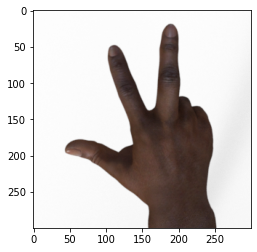

In [45]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]

image = train_images[0].reshape(300,300)

plt.imshow(image, cmap='Greys_r')
plt.imshow(rgb_image)

## Convert PNG/JPG to numpy

<class 'imageio.core.util.Array'>
(668, 1356, 3)


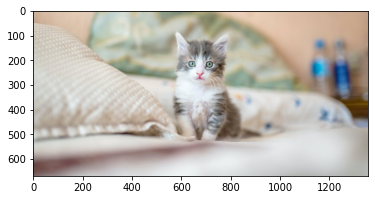

In [50]:
import imageio

im = imageio.imread('https://images.theconversation.com/files/336248/original/file-20200520-152302-97x8pw.jpg?ixlib=rb-1.1.0&rect=0%2C1248%2C6837%2C3418&q=45&auto=format&w=1356&h=668&fit=crop')
print(type(im))

im_np = np.asarray(im)
print(im_np.shape)

plt.imshow(im)